In [164]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [167]:
Position_Player_df = pd.read_csv('Combined CSV\PositionPlayers_Complete.csv')

In [168]:
Position_Player_df.shape

(10506, 45)

In [169]:
Position_Player_df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'weight', 'height', 'bats_L',
       'bats_R', 'throws_L', 'throws_R', 'Seasons', 'Games', 'At_Bats', 'Runs',
       'Hits', 'Doubles', 'Triples', 'Homeruns', 'RBIs', 'Stolen_Bases',
       'Walks', 'Intentional_Walks', 'Strike_Outs', 'Hit_by_Pitch', 'Sac_Hits',
       'Sac_Flys', 'Double_Plays', 'finalGame', 'Retired_Years', 'inducted',
       'yearID', 'Total_Games', 'Games_Started', 'Pitcher', 'Catcher',
       'FirstBase', 'SecondBase', 'ThirdBase', 'ShortStop', 'LeftField',
       'CenterField', 'RightField', 'Outfield', 'DH', 'Primary_Position',
       'Hall_Eligible'],
      dtype='object')

In [170]:
Position_Player_df.head()

,playerID,nameFirst,nameLast,weight,height,bats_L,bats_R,throws_L,throws_R,Seasons,...,SecondBase,ThirdBase,ShortStop,LeftField,CenterField,RightField,Outfield,DH,Primary_Position,Hall_Eligible
0,aaronha01,Hank,Aaron,180.0,72.0,0,1,0,1,23,...,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,Outfield,1
1,aaronto01,Tommie,Aaron,190.0,75.0,0,1,0,1,7,...,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,FirstBase,0
2,abadan01,Andy,Abad,184.0,73.0,1,0,1,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,FirstBase,0
3,abadijo01,John,Abadie,192.0,72.0,0,1,0,1,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FirstBase,0
4,abbated01,Ed,Abbaticchio,170.0,71.0,0,1,0,1,11,...,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,SecondBase,1


In [171]:
Position_Player_train_model = Position_Player_df[Position_Player_df['Hall_Eligible']==1]
Position_Player_train_model.head()

,playerID,nameFirst,nameLast,weight,height,bats_L,bats_R,throws_L,throws_R,Seasons,...,SecondBase,ThirdBase,ShortStop,LeftField,CenterField,RightField,Outfield,DH,Primary_Position,Hall_Eligible
0,aaronha01,Hank,Aaron,180.0,72.0,0,1,0,1,23,...,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,Outfield,1
4,abbated01,Ed,Abbaticchio,170.0,71.0,0,1,0,1,11,...,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,SecondBase,1
8,abbotku01,Kurt,Abbott,180.0,71.0,0,1,0,1,11,...,0.246439,0.061254,0.497151,0.045584,0.005698,0.011396,0.061254,0.008547,ShortStop,1
15,abramca01,Cal,Abrams,185.0,72.0,1,0,1,0,12,...,0.000000,0.000000,0.000000,0.167549,0.176367,0.477954,0.776014,0.000000,Outfield,1
16,abreubo01,Bobby,Abreu,220.0,72.0,1,0,0,1,22,...,0.000000,0.000000,0.000000,0.058557,0.008660,0.820619,0.881649,0.066392,Outfield,1


In [172]:
scale_pos_weight = (Position_Player_train_model.inducted.value_counts()[0])/Position_Player_train_model.inducted.value_counts()[1]
print(scale_pos_weight)

15.210191082802547


In [173]:
# Getting data ready for machine learning
data = Position_Player_train_model.drop(['inducted', 
                                  'playerID', 
                                  'nameFirst', 
                                  'nameLast', 
                                  'finalGame', 
                                  'bats_L',
                                  'bats_R', 
                                  'throws_L', 
                                  'throws_R',
                                  'Pitcher',
                                  'weight', 
                                  'height',
                                  'yearID',
                                  'Retired_Years',
                                  'Primary_Position',
                                  'Hall_Eligible'], axis=1)
data.fillna(0, inplace=True)
target = Position_Player_train_model['inducted']
target.fillna('0', inplace=True)
feature_names = data.columns

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [175]:
len(X_test)

637

In [176]:
#CLF = Classifier
clf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8822605965463108

In [177]:
y_predicted = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
print(confusion_matrix(y_test, y_predicted))

predictions_df = pd.concat([pd.DataFrame(X_test_scaled),              
                            pd.DataFrame(dict(predicted= y_predicted,actual=y_test
                            )).reset_index(drop=True)], axis=1)

[[524  74]
 [  1  38]]


In [178]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_predicted))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.88      0.97      0.93      0.92      0.85       598
          1       0.34      0.97      0.88      0.50      0.92      0.86        39

avg / total       0.96      0.88      0.97      0.91      0.92      0.85       637



In [179]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_predicted) 

0.9253065774804905

In [180]:
# List the features sorted in descending order by feature importance
sorted(zip(clf.feature_importances_, data.columns), reverse=True)

[(0.12932185525019715, 'Hits'),
 (0.11873867647223409, 'Runs'),
 (0.10579146353625402, 'At_Bats'),
 (0.09696722611963224, 'RBIs'),
 (0.08889464361246728, 'Doubles'),
 (0.07552560689538422, 'Total_Games'),
 (0.056678964548606894, 'Games'),
 (0.041993571381917554, 'Triples'),
 (0.03995797794563761, 'Walks'),
 (0.030048172314373463, 'Games_Started'),
 (0.021007028620252343, 'Seasons'),
 (0.019726223150125042, 'Strike_Outs'),
 (0.017292295490309372, 'Hit_by_Pitch'),
 (0.016024481393716525, 'Sac_Hits'),
 (0.013842660599485154, 'Homeruns'),
 (0.012935911691778703, 'Sac_Flys'),
 (0.012564646663086848, 'Intentional_Walks'),
 (0.012531621283603212, 'Stolen_Bases'),
 (0.012499722101126312, 'Double_Plays'),
 (0.01161716657170509, 'DH'),
 (0.011255833106468176, 'FirstBase'),
 (0.01082085433408642, 'RightField'),
 (0.008105792032979675, 'ThirdBase'),
 (0.007712711701486699, 'Outfield'),
 (0.00691633728545867, 'LeftField'),
 (0.006659686995209091, 'ShortStop'),
 (0.005733213732118967, 'CenterField')

<BarContainer object of 29 artists>

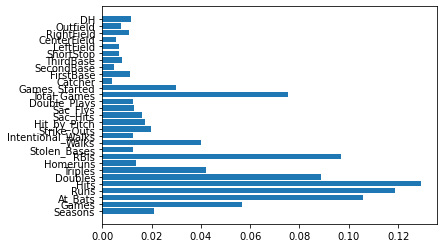

In [181]:
plt.barh(feature_names,clf.feature_importances_)

In [182]:
predictions_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,predicted,actual
0,0.047816,1.775483,1.982616,2.053922,2.247303,1.075413,2.053451,-0.563400,0.238077,1.272550,...,-0.439544,-0.468612,-0.433741,-0.360659,3.672978,-0.439346,1.628617,-0.343150,1,1
1,0.551867,0.984215,1.391951,2.668048,1.827376,1.139825,2.339680,0.176148,2.203312,4.218038,...,-0.403658,-0.451074,-0.387346,1.053822,1.308413,0.685063,1.648160,-0.343150,1,1
2,-0.960285,-1.398340,-1.309635,-1.199359,-1.264542,-1.195087,-0.951951,-0.553796,-1.104101,-0.745975,...,-0.443496,-0.468612,-0.433741,-0.577104,-0.481891,-0.544261,-0.834139,-0.343150,0,0
3,-0.456234,0.431028,0.019249,-0.074343,-0.101897,-0.164506,-0.350870,0.685188,0.166714,-0.607364,...,-0.443496,-0.232784,-0.433741,-0.170741,0.704451,0.899981,0.737135,-0.343150,0,0
4,1.811993,0.157936,-0.228911,-0.111403,-0.254326,-0.269174,0.507816,-0.169615,-0.431639,0.631474,...,-0.443496,-0.468612,-0.433741,0.495809,1.061359,0.973792,1.200423,-0.165415,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,-0.456234,0.238463,0.263384,-0.029343,0.223882,0.165603,-0.379493,0.310612,0.125543,-0.616027,...,-0.440197,3.402142,-0.430667,-0.577104,-0.481891,-0.544261,-0.834139,-0.268119,0,0
633,-0.456234,0.406520,0.264278,0.383604,0.174567,0.270271,-0.121887,0.329821,0.037711,-0.191530,...,-0.013161,-0.085058,2.716466,-0.573596,-0.472097,-0.544261,-0.826851,-0.333162,0,0
634,-0.708260,0.466040,0.669382,0.267132,0.621393,0.447402,-0.465362,0.435471,0.627831,-0.633353,...,-0.443496,3.669062,-0.433741,-0.577104,-0.481891,-0.544261,-0.834139,-0.343150,0,0
635,0.299841,0.336496,0.445815,0.534489,0.322513,0.616482,-0.579853,2.097054,1.217950,-0.633353,...,-0.443496,-0.468612,-0.433741,-0.183572,-0.481891,-0.533537,-0.627861,0.232506,0,0


In [183]:
import os
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [184]:
# fit model to training data
XGmodel = XGBClassifier(scale_pos_weight=1)
XGmodel.fit(X_train_scaled, y_train)
y_pred = XGmodel.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [185]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_pred,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
actual_inductees = predictions_df.loc[predictions_df.actual==1]
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
print(predictions_for_actual_inductees)

[[589   9]
 [ 13  26]]
1    26
0    13
Name: predicted, dtype: int64


<BarContainer object of 29 artists>

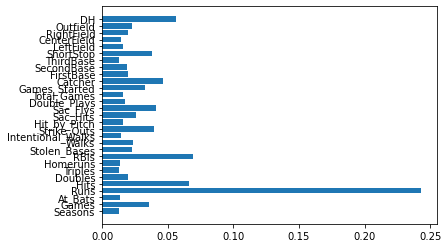

In [186]:
plt.barh(feature_names,XGmodel.feature_importances_)

In [187]:
# Run all data through the model to determine who should be in the hall of fame.
data_total = Position_Player_df.drop(['inducted', 
                                  'playerID', 
                                  'nameFirst', 
                                  'nameLast', 
                                  'finalGame', 
                                  'bats_L',
                                  'bats_R', 
                                  'throws_L', 
                                  'throws_R',
                                  'weight', 
                                  'height',
                                  'Pitcher',
                                  'yearID',
                                  'Retired_Years',
                                  'Primary_Position',
                                  'Hall_Eligible'], axis=1)
data_total.fillna(0, inplace=True)
data_total=data_total.fillna(0)
data_total.head()

,Seasons,Games,At_Bats,Runs,Hits,Doubles,Triples,Homeruns,RBIs,Stolen_Bases,...,Catcher,FirstBase,SecondBase,ThirdBase,ShortStop,LeftField,CenterField,RightField,Outfield,DH
0,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,...,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946
1,7,437,944,102,216,42,6,13,94.0,9.0,...,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000
2,3,15,21,1,2,0,0,0,0.0,0.0,...,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000
3,3,12,49,4,11,0,0,0,5.0,1.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,11,855,3044,355,772,99,43,11,324.0,142.0,...,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000


In [188]:
data_total_scaler = StandardScaler().fit(data_total)
data_total_scaled = data_total_scaler.transform(data_total)
data_total_predicted = XGmodel.predict(data_total_scaled)

In [189]:
pitchers_predict_df = pd.concat([Position_Player_df, pd.Series(data_total_predicted)], axis=1)
pitchers_predict_df = pitchers_predict_df.rename(columns={0:'model_predict'})
pitchers_predict_df['Comparison']=pitchers_predict_df['inducted']==pitchers_predict_df['model_predict']
pitchers_predict_df.head()

,playerID,nameFirst,nameLast,weight,height,bats_L,bats_R,throws_L,throws_R,Seasons,...,ShortStop,LeftField,CenterField,RightField,Outfield,DH,Primary_Position,Hall_Eligible,model_predict,Comparison
0,aaronha01,Hank,Aaron,180.0,72.0,0,1,0,1,23,...,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,Outfield,1,1,True
1,aaronto01,Tommie,Aaron,190.0,75.0,0,1,0,1,7,...,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,FirstBase,0,0,True
2,abadan01,Andy,Abad,184.0,73.0,1,0,1,0,3,...,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,FirstBase,0,0,True
3,abadijo01,John,Abadie,192.0,72.0,0,1,0,1,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FirstBase,0,0,True
4,abbated01,Ed,Abbaticchio,170.0,71.0,0,1,0,1,11,...,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,SecondBase,1,0,True


In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [192]:
y_pred = knn.predict(X_test_scaled)

In [193]:
from imblearn.over_sampling import ADASYN 

In [194]:
ada = ADASYN()
X_ada, y_ada = ada.fit_sample(X_train_scaled,y_train)

In [195]:
clf_ada = BalancedRandomForestClassifier(random_state=0)
clf_ada = clf.fit(X_ada, y_ada)
clf.score(X_test_scaled, y_test)

0.9434850863422292

In [196]:
y_predicted_ada = clf_ada.predict(X_test_scaled)
# from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted_ada))

predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_predicted_ada,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
# pd.Series(y_test).value_counts()#[:20]
actual_inductees = predictions_df.loc[predictions_df.actual=='1']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()

[[567  31]
 [  5  34]]


<BarContainer object of 29 artists>

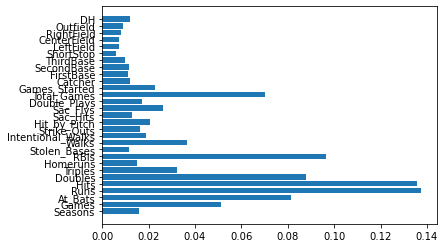

In [197]:
plt.barh(feature_names,clf_ada.feature_importances_)

In [198]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled,y_train)
model_smote_tomek = XGBClassifier(scale_pos_weight=1)
model_smote_tomek.fit(X_resampled, y_resampled)
y_pred_smote_tomek = model_smote_tomek.predict(X_train_scaled)
print(len(X_resampled), len(y_resampled))

3580 3580


In [199]:
predictions_df = pd.concat([pd.DataFrame(X_resampled),
                           pd.DataFrame(dict(
                           predicted= y_pred_smote_tomek,
                           actual=y_test)).reset_index(drop=True) ], axis=1)
actual_inductees = predictions_df.loc[predictions_df.actual=='1']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
print(classification_report(y_test, y_pred_smote_tomek))

ValueError: array length 1908 does not match index length 637